<a href="https://colab.research.google.com/github/Daniellineto/Projeto_Final_minera/blob/main/violencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

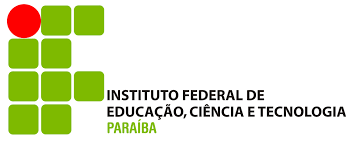

<center>

INSTITUTO FEDERAL DE CIÊNCIA E TECNOLOGIA DA PARAÍBA

CAMPUS CAMPINA GRANDE

BACHARELADO EM ENGENHARIA DA COMPUTAÇÃO

DISCIPLINA: MINERAÇÃO DE DADOS

PROFESSOR: PAULO RIBEIRO LINS JÚNIOR

<center>

<br>
<br>

**Classificação de registros de violência urbana**

<br>

Daniel Lima Neto <br>
Victor José Cordeiro de Medeiros

<center>

<br>
<br>
<br>

17 de dezembro de 2025 <br>
Campina Grande, PB

---

# INTRODUÇÃO

A violência urbana é um dos principais problemas sociais enfrentados pelos grandes centros urbanos brasileiros, impactando diretamente a qualidade de vida da população e o planejamento de políticas públicas de segurança. A análise de dados criminais, quando associada a técnicas de aprendizado profundo (Deep Learning), permite identificar padrões complexos e apoiar processos de tomada de decisão baseados em dados.

Neste contexto, este projeto tem como objetivo aplicar técnicas de Deep Learning para classificar registros de violência urbana no estado do Rio de Janeiro, utilizando dados públicos disponibilizados por órgãos oficiais de segurança. Além disso, é proposto um índice de severidade criminal, capaz de representar não apenas a quantidade de crimes registrados, mas também sua gravidade relativa, permitindo análises comparativas entre regiões e municípios.

# FERRAMENTAS UTILIZADAS
Para o desenvolvimento do projeto, foram utilizadas as seguintes ferramentas e bibliotecas:

* **Pandas e NumPy**: manipulação, limpeza e transformação dos dados.

* **Scikit-learn**: pré-processamento (normalização, codificação de rótulos), divisão dos dados e métricas de avaliação.

* **TensorFlow / Keras**: construção, treinamento e avaliação do modelo de Deep Learning.

* **Matplotlib**: geração de gráficos estatísticos.

* **GeoPandas**: manipulação de dados geográficos e visualização espacial da severidade criminal.

Todas as etapas foram implementadas respeitando a exigência de uso exclusivo de técnicas de Deep Learning para a solução do problema de classificação.

# Metodologia

Inicialmente, o dataset foi carregado e submetido a um processo de limpeza e padronização, com destaque para a correção de problemas de codificação na coluna **regiao**. Apenas quatro regiões principais foram consideradas: **Capital, Interior, Baixada Fluminense e Grande Niterói.**

Em seguida, foram selecionadas apenas as colunas numéricas relacionadas a crimes, removendo variáveis administrativas e temporais que não contribuem diretamente para o aprendizado do modelo. A partir dessas variáveis, foi criado um índice de severidade criminal, no qual cada tipo de crime recebeu um peso proporcional à sua gravidade, permitindo diferenciar crimes letais, crimes de violência grave, crimes patrimoniais e demais ocorrências.

Os dados de entrada foram normalizados utilizando o **StandardScaler,** enquanto a variável alvo foi codificada em formato one-hot para possibilitar a classificação multiclasse. Devido ao desbalanceamento entre as classes regionais, foram aplicados pesos de classe durante o treinamento da rede neural.

O modelo de Deep Learning foi implementado como uma rede neural densa com múltiplas camadas ocultas, utilizando funções de ativação ReLU, normalização por Batch Normalization e regularização via Dropout. O treinamento foi monitorado com técnicas de Early Stopping e redução adaptativa da taxa de aprendizado, visando evitar overfitting.

# Resultados Esperados

Espera-se que o modelo seja capaz de classificar corretamente os registros de violência urbana de acordo com a região, alcançando uma acurácia superior ao acaso e apresentando bom equilíbrio entre precision, recall e f1-score.

Além da classificação, o índice de severidade permite análises exploratórias importantes, como:

* Comparação da severidade média dos crimes entre regiões;

* Identificação de municípios com maior concentração de crimes graves;

* Visualização espacial da severidade criminal por meio de mapas coropléticos.

Essas análises fornecem uma visão mais rica do problema, indo além da simples contagem de ocorrências.

# Funcionalidade Adicional

Como etapa complementar, foi realizada a agregação da severidade criminal por município, permitindo a criação de um mapa de calor do estado do Rio de Janeiro. Essa visualização facilita a identificação de padrões espaciais e regiões com maior concentração de crimes severos, contribuindo para uma análise mais intuitiva e interpretável dos dados.

Municípios sem dados disponíveis foram destacados em cinza, garantindo clareza na interpretação do mapa.

---

## Importanto bibliotecas e lendo dataset

In [ ]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Pré-processamento e avaliação
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
# Leitura do dataset
df = pd.read_csv("Base_RJ.csv", encoding = 'utf-8', sep = ';')
df.head()

,cisp,mes,ano,mes_ano,aisp,risp,munic,mcirc,regiao,hom_doloso,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,1,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,0,...,NaN,NaN,21,2,0,0,0,0,578,3
1,4,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,3,...,NaN,NaN,15,6,0,1,0,0,441,3
2,5,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,3,...,NaN,NaN,47,2,1,0,0,0,637,3
3,6,1,2003,2003m01,1,1,Rio de Janeiro,3304557,Capital,6,...,NaN,NaN,26,2,1,0,0,0,473,3
4,7,1,2003,2003m01,1,1,Rio de Janeiro,3304557,Capital,4,...,NaN,NaN,10,1,3,0,0,0,147,3


In [ ]:
df.shape

(36903, 63)

## Tratando e organizando Dataset

In [ ]:
# Garantir que a coluna é texto
df['regiao'] = df['regiao'].astype(str)

# Padronizar formato do texto
df['regiao'] = df['regiao'].str.strip().str.lower()

# Corrigir problemas de codificação e unificar nomes
df['regiao'] = df['regiao'].replace({
    'grande niterãƒâ³i': 'grande niteroi',
    'grande niterã³i': 'grande niteroi',
    'grande niterói': 'grande niteroi',
    'niteroi': 'grande niteroi',
    'capital': 'capital',
    'interior': 'interior',
    'baixada fluminense': 'baixada fluminense'
})

In [ ]:
# Definição das regiões consideradas no estudo
regioes_validas = [
    'capital',
    'interior',
    'baixada fluminense',
    'grande niteroi'
]

# Filtrar apenas registros dessas regiões
df = df[df['regiao'].isin(regioes_validas)]

# Conferir a quantidade de registros por região
df['regiao'].value_counts()

,count
regiao,
interior,17991
capital,11074
baixada fluminense,5098
grande niteroi,20


## Manipulando variaveis para tratamento do modelo

In [ ]:
from sklearn.utils.validation import column_or_1d

# Selecionar apenas colunas numéricas (crimes)
crime_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Remover colunas administrativas que não representam crimes
crime_cols = crime_cols.drop(
    ['fase', 'registro_ocorrencias', 'aisp', 'mcirc', 'risp',
     'cvli', 'cisp', 'apf', 'aaapai', 'cmp', 'cmba'],
    errors='ignore'
)

# Exibir colunas finais de crimes
crime_cols

Index(['mes', 'ano', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'letalidade_violenta', 'tentat_hom',
       'lesao_corp_dolosa', 'estupro', 'hom_culposo', 'lesao_corp_culposa',
       'roubo_transeunte', 'roubo_celular', 'roubo_em_coletivo', 'roubo_rua',
       'roubo_veiculo', 'roubo_carga', 'roubo_comercio', 'roubo_residencia',
       'roubo_banco', 'roubo_cx_eletronico', 'roubo_conducao_saque',
       'roubo_apos_saque', 'roubo_bicicleta', 'outros_roubos', 'total_roubos',
       'furto_veiculos', 'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'ameaca', 'pessoas_desaparecidas',
       'encontro_cadaver', 'encontro_ossada', 'pol_militares_mortos_serv',
       'pol_civis_mortos_serv'],
      d

In [ ]:
# Remover colunas de data
remover = ['ano', 'mes']

crime_cols = [c for c in crime_cols if c not in remover]

In [ ]:
# Dicionário para armazenar os pesos dos crimes
pesos = {}

for col in crime_cols:
    col_lower = col.lower()

    # Crimes letais
    if any(x in col_lower for x in ['hom', 'latrocinio', 'letal']):
        pesos[col] = 5

    # Crimes de violência grave
    elif any(x in col_lower for x in ['estupro', 'lesao_corp_morte', 'lesao seguida', 'morte', 'sequestro']):
        pesos[col] = 4

    # Roubos e tráfico
    elif any(x in col_lower for x in ['roubo', 'trafico']):
        pesos[col] = 3

    # Furtos
    elif 'furto' in col_lower:
        pesos[col] = 2

    # Demais ocorrências
    else:
        pesos[col] = 1

In [ ]:
# Inicializar a coluna de severidade
df['severidade'] = 0

# Calcular a severidade ponderada dos crimes
for col, peso in pesos.items():
    if col in df.columns:
        df['severidade'] += df[col] * peso

In [ ]:
# Converter o dicionário de pesos em DataFrame
pesos_df = pd.DataFrame.from_dict(pesos, orient='index', columns=['peso'])

# Ordenar os crimes por peso (maior severidade primeiro)
pesos_df.sort_values(by='peso', ascending=False)

,peso
hom_doloso,5
latrocinio,5
hom_por_interv_policial,5
tentat_hom,5
letalidade_violenta,5
hom_culposo,5
lesao_corp_morte,4
estupro,4
sequestro_relampago,4
sequestro,4


---

## Iniciando fase de treinamento do Modelo

In [ ]:
# Selecionar as variáveis de entrada
X = df[crime_cols].copy()
X['severidade'] = df['severidade']

# Tratar valores inválidos
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(0)

# Variável alvo
y = df['regiao']

In [ ]:
# Normalizar os dados de entrada
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Codificar os rótulos das regiões
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Converter para formato one-hot
y_cat = to_categorical(y_encoded)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Calcular pesos para balancear as classes
classes = np.unique(y_encoded)
weights = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=y_encoded
)

# Criar dicionário de pesos por classe
class_weights = dict(zip(classes, weights))
class_weights

{np.int64(0): np.float64(1.6762946253432718),
 np.int64(1): np.float64(0.7716949611703088),
 np.int64(2): np.float64(427.2875),
 np.int64(3): np.float64(0.4750013895836807)}

In [ ]:
# Exibir o mapeamento das classes codificadas
label_encoder.classes_

array(['baixada fluminense', 'capital', 'grande niteroi', 'interior'],
      dtype=object)

## Treinamento do Modelo

In [ ]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_cat,
    test_size=0.2,
    random_state=42,
    stratify=y_cat
)

In [ ]:
# Definição da arquitetura da rede neural
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    Dropout(0.4),

    Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),

    Dense(y_train.shape[1], activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Definir o otimizador
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)

# Compilar o modelo
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Early stopping para evitar overfitting
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Redução automática da taxa de aprendizado
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6
)

In [ ]:
# Treinamento do modelo
history = model.fit(
    X_train, y_train,
    epochs=150,
    batch_size=128,
    validation_split=0.2,
    class_weight=class_weights,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

Epoch 1/150
171/171 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.6182 - loss: 1.2031 - val_accuracy: 0.7318 - val_loss: 0.7406 - learning_rate: 5.0000e-04
Epoch 2/150
171/171 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7382 - loss: 0.6813 - val_accuracy: 0.7973 - val_loss: 0.5783 - learning_rate: 5.0000e-04
Epoch 3/150
171/171 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7666 - loss: 0.5999 - val_accuracy: 0.8298 - val_loss: 0.4927 - learning_rate: 5.0000e-04
Epoch 4/150
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7874 - loss: 0.5239 - val_accuracy: 0.8497 - val_loss: 0.4444 - learning_rate: 5.0000e-04
Epoch 5/150
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8133 - loss: 0.4640 - val_accuracy: 0.8713 - val_loss: 0.3864 - learning_rate: 5.0000e-04
Epoch 6/150
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8258 - loss: 0.4693 - val_accuracy: 0.8770 - val_loss: 0.3731 - learning_rate: 5.0000e-04
Epoch 7/150
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - a

## Fase de Avaliação

In [ ]:
# Avaliar o modelo no conjunto de teste
loss, acc = model.evaluate(X_test, y_test)

# Exibir a acurácia final
print(f"Acurácia no conjunto de teste: {acc:.4f}")


214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9478 - loss: 0.1526
Acurácia no conjunto de teste: 0.9495


In [ ]:
# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Converter probabilidades em classes
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Relatório de avaliação do modelo
print(classification_report(
    y_true,
    y_pred_classes,
    target_names=label_encoder.classes_
))

214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
                    precision    recall  f1-score   support

baixada fluminense       0.83      0.89      0.86      1020
           capital       0.98      0.96      0.97      2215
    grande niteroi       0.33      0.75      0.46         4
          interior       0.97      0.96      0.97      3598

          accuracy                           0.95      6837
         macro avg       0.78      0.89      0.81      6837
      weighted avg       0.95      0.95      0.95      6837



In [ ]:
# Gerar a matriz de confusão
confusion_matrix(y_true, y_pred_classes)

array([[ 910,   35,    2,   73],
       [  61, 2117,    0,   37],
       [   1,    0,    3,    0],
       [ 122,   10,    4, 3462]])

In [ ]:
# Calcular a severidade média por região
severidade_regiao = (
    df.groupby('regiao')['severidade']
    .mean()
    .reset_index()
)

# Exibir o resultado
severidade_regiao

,regiao,severidade
0,baixada fluminense,2188.743514
1,capital,2380.880483
2,grande niteroi,1169.050000
3,interior,408.438932


In [ ]:
# Normalizar a severidade para visualização
from sklearn.preprocessing import MinMaxScaler

scaler_map = MinMaxScaler()
severidade_regiao['sev_norm'] = scaler_map.fit_transform(
    severidade_regiao[['severidade']]
)

---

## Representação Gráfica dos Resultados e gerando Mapa de calor

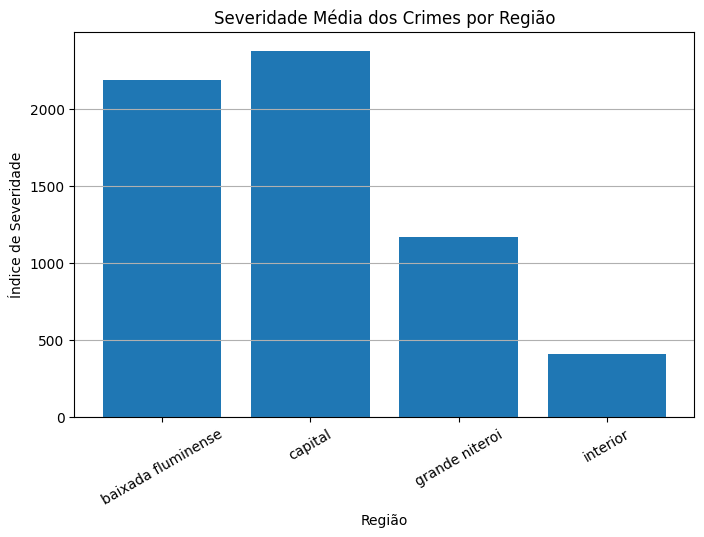

In [ ]:
import matplotlib.pyplot as plt

# Gráfico de barras da severidade média por região
plt.figure(figsize=(8,5))
plt.bar(
    severidade_regiao['regiao'],
    severidade_regiao['severidade']
)

plt.title('Severidade Média dos Crimes por Região')
plt.ylabel('Índice de Severidade')
plt.xlabel('Região')
plt.xticks(rotation=30)
plt.grid(axis='y')
plt.show()

In [ ]:
# Severidade média por município
sev_munic = (
    df.groupby('munic')['severidade']
    .mean()
    .reset_index()
)

In [ ]:
# Carregar o mapa dos municípios do RJ
import geopandas as gpd

munic_rj = gpd.read_file(
    "https://raw.githubusercontent.com/tbrugz/geodata-br/master/geojson/geojs-33-mun.json"
)

# Manter apenas nome do município e geometria
munic_rj = munic_rj[['name', 'geometry']]

# Renomear coluna para facilitar o merge
munic_rj.rename(columns={'name': 'munic'}, inplace=True)

In [ ]:
# Padronizar nomes dos municípios para o merge
munic_rj['munic'] = munic_rj['munic'].str.upper().str.strip()
sev_munic['munic'] = sev_munic['munic'].str.upper().str.strip()

In [ ]:
# Juntar o mapa dos municípios com a severidade calculada
mapa = munic_rj.merge(sev_munic, on='munic', how='left')

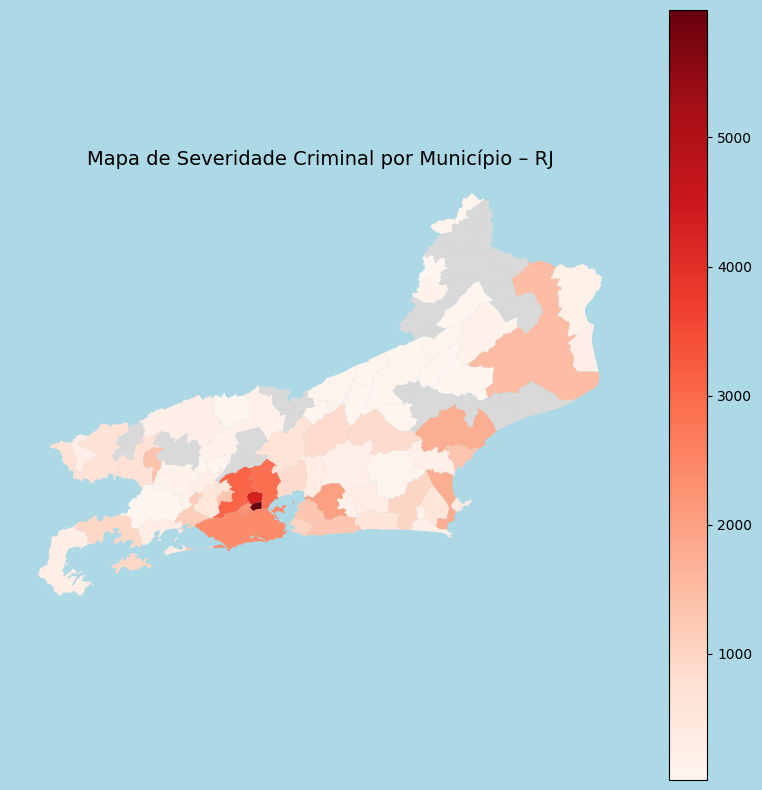

In [ ]:
import matplotlib.pyplot as plt

# Criar figura e eixo do mapa
fig, ax = plt.subplots(
    1, 1, figsize=(10,10),
    facecolor='lightblue'
)

# Cor de fundo do mapa
ax.set_facecolor('#f2f2f2')

# Plotar severidade por município
mapa.plot(
    column='severidade',
    cmap='Reds',
    legend=True,
    ax=ax,
    missing_kwds={
        "color": "#d9d9d9",
        "label": "Sem dados"
    }
)

# Título e ajustes finais
ax.set_title('Mapa de Severidade Criminal por Município – RJ', fontsize=14)
ax.axis('off')

plt.show()

---

# CONCLUSÃO FINAL

violência urbana, utilizando dados públicos brasileiros. A criação de um índice de severidade criminal mostrou-se uma estratégia eficaz para enriquecer a análise, incorporando a gravidade dos crimes ao processo de modelagem.

Os resultados obtidos evidenciam o potencial do aprendizado profundo como ferramenta de apoio à análise de segurança pública, possibilitando tanto a classificação automática de registros quanto a geração de insights relevantes por meio de visualizações estatísticas e espaciais.

Como trabalhos futuros, sugere-se a incorporação de dados temporais para análise de tendências ao longo dos anos, bem como a experimentação de arquiteturas mais avançadas de redes neurais e técnicas de explicabilidade para melhor compreensão das decisões do modelo.